In [1]:
using Pkg
Pkg.activate("..")
using Revise
using PythonPlot,Statistics,Distributions,DataFrames,CSV
PythonPlot.svg(true)
using SizeStructuredPopulations
using SpecialFunctions
include("./examples.jl")

methods(generate_cell)

# random seed Distributions
using Random
Random.seed!(1234)

  Activating project at `~/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/SizeStructuredPopulations`
[ Info: Precompiling IJuliaReviseExt [b74c6c38-2542-566b-9b5f-490bff998244] 
    CondaPkg Found dependencies: /Users/elevien/.julia/packages/PythonCall/WMWY0/CondaPkg.toml
    CondaPkg Found dependencies: /Users/elevien/.julia/packages/PythonPlot/oS8x4/CondaPkg.toml
    CondaPkg Initialising pixi
             │ /Users/elevien/.julia/artifacts/d2fecc2a9fa3eac2108d3e4d9d155e6ff5dfd0b2/bin/pixi
             │ init
             │ --format pixi
             └ /Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/SizeStructuredPopulations/.CondaPkg
✔ Created /Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/SizeStructuredPopulations/.CondaPkg/pixi.toml
    CondaPkg Wrote /Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/SizeStructuredPopulations/.CondaPkg/pixi.toml
             │ [dependencies]
             │ matplotlib = ">=1"
 

TaskLocalRNG()

In [33]:
M1()

(var"#λ#103"(), var"#β#104"{Float64, Float64, var"#λ#103"}(0.01, 0.5, var"#λ#103"()), var"#h#105"(), var"#L#106"{Float64}(0.01))

In [40]:
models = [M1(), M2(),M0()]
init = vcat([0.0], [0.0, 0.0], zeros(3))
T = 15.0
dt = 0.01
Tmax = T

function terminate(cell)
    return cell.time[end] > Tmax 
end

dfs = Vector{DataFrame}(undef, length(models))

for (i, m) in enumerate(models)
    model = GrowthModel(m...)

    cell = simulate_lineage(model,T, init, dt = 0.01);
    df = lineage_to_dataframe(cell);
    dfs[i] = df
end

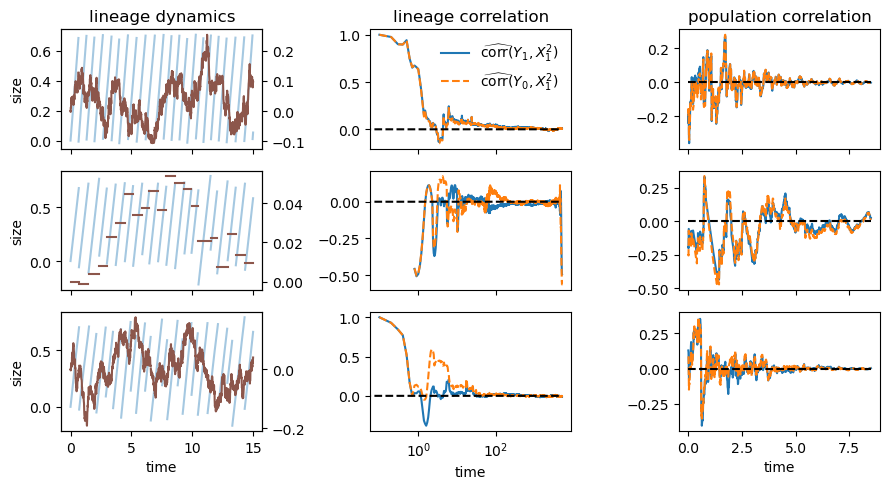

In [41]:
df_corrs = CSV.read("fig2_correlation_data.csv", DataFrame)

fig,axs = subplots(figsize=(9,5),ncols=3,nrows=3,sharex="col")

for i in 1:3
    ax = axs[i-1,0]
    axt = ax.twinx()
    df = dfs[i]
    #df = df[df.time .< 20.0,:]
    for p in unique(df.position)
        d = df[df.position .== p,:]
        ax.plot(d.time,d.z1,"C0-",alpha=0.4)
        axt.plot(d.time,d.x1,"C5-")
    end


    ax = axs[i-1,1]
    dfc = df_corrs[(df_corrs.model .==i) .& (df_corrs.ensemble .== "lineage"),:]
    ax.semilogx(dfc.time,dfc.z1_x12,label=L"\widehat{{\rm corr}}(Y_1,X_1^2)")
    ax.semilogx(dfc.time,dfc.z2_x12,"--",label=L"\widehat{{\rm corr}}(Y_0,X_1^2)")
    ax.plot(dfc.time,zeros(length(dfc.time)), "k--")


    ax = axs[i-1,2]
    dfc = df_corrs[(df_corrs.model .==i) .& (df_corrs.ensemble .== "population"),:]
    ax.plot(dfc.time,dfc.z1_x12)
    ax.plot(dfc.time,dfc.z2_x12,"--")
    ax.plot(dfc.time,zeros(length(dfc.time)), "k--")
end

axs[0,1].legend(loc="upper right",frameon=false)

axs[0,0].set_ylabel("size")
axs[1,0].set_ylabel("size")
axs[2,0].set_ylabel("size")
axs[0,0].set_title("lineage dynamics")
axs[0,1].set_title("lineage correlation")
axs[0,2].set_title("population correlation")

axs[2,0].set_xlabel("time")
axs[2,1].set_xlabel("time")
axs[2,2].set_xlabel("time")

tight_layout()
savefig("./fig2.pdf")
fig

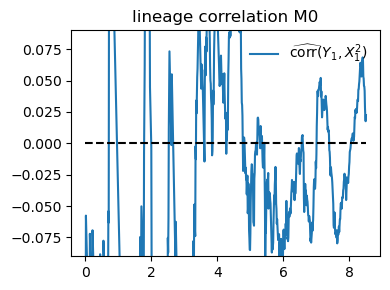

In [52]:
dfc = df_corrs[(df_corrs.model .==2) .& (df_corrs.ensemble .== "population"),:]

fig,ax = subplots(figsize=(4,3))
ax.plot(dfc.time,dfc.z1_x12,label=L"\widehat{{\rm corr}}(Y_1,X_1^2)")
ax.plot(dfc.time,zeros(length(dfc.time)), "k--")
ax.set_title("lineage correlation M0")
ax.legend(loc="upper right",frameon=false)
ax.set_ylim([-0.09,0.09])
tight_layout() 
fig